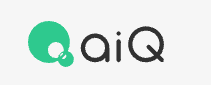

[disclaimer](../../disclaimer.txt/)

# Load FACTSET Consensus Estimate data.
This sample show how to achieve the following operation with a simple interface

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database

In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
from aiq_strategy_robot.data.FACTSET import load_factset_fundamental_estimates

In [2]:
handler = DAL()
data_source='FACTSET'

### Pattern 1: look up FACTSET from symbols, package and freq.

#### Find out factset symbols from tickers

In [3]:
handler.load(
    data_source,
    data_type="symbol_lookup",
    ticker=["GOOG-US", 'MSFT-US'],
    exchange_code="NAS",
    pick_only_primary=True
).retrieve().head()

,FSYM_ID,FSYM_SECURITY_ID,FACTSET_ENTITY_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,P8R3C2-R,DF3K29-S,000Q07-E,MSFT-US,Microsoft Corporation,NAS,USD,BBG000BPH459,MSFT US
2,WFJYTJ-R,DC1QVX-S,0FPWZZ-E,GOOG-US,Alphabet Inc. Class C,NAS,USD,BBG009S3NB30,GOOG US


### `load_factset_fundamental_estimates`  
loading FACTSET consensus estimates 

In [4]:
handler = load_factset_fundamental_estimates(handler,                        
                                    symbols=["WFJYTJ-R","P8R3C2-R"],
                                    package="BASIC",
                                    freq=3)

handler.retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,P8R3C2-R,SALES,USD,2,37177.304999,37391.250000,18,34907.560000,38485.00,838.634837,4,6,2020-03-25,2020-03-25,2004-11-15,2020-06-30
1,P8R3C2-R,EPS,USD,3,0.913029,0.925000,30,0.800000,1.01,0.049630,1,1,2018-01-22,2018-01-22,2004-11-15,2018-06-30
2,P8R3C2-R,EPS,USD,2,0.994967,0.997726,30,0.850000,1.09,0.052406,29,0,2018-02-02,2018-02-03,2004-11-15,2018-06-30
3,P8R3C2-R,EPS,USD,1,1.078143,1.080000,29,1.030000,1.13,0.020731,29,0,2018-07-06,2018-07-08,2004-11-15,2018-06-30
4,P8R3C2-R,EPS,USD,8,0.859648,0.835384,6,0.797118,0.97,0.068523,0,1,2017-01-24,2017-01-26,2004-11-15,2018-09-30


### Data Access handler load
Load the data to memory

same return as **load_factset_fundamental_estimates**
```
sdh = load_factset_fundamental_estimates(handler,                        
                                    symbols="WFJYTJ-R",
                                    package="BASIC",
                                    freq=3)

```

In [5]:
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,SALES,USD,4,74716.150011,75157.000000,21,67052.000000,76980.766078,2093.966140,0,2,2022-01-18,2022-01-20,2022-07-18,2022-09-30
1,WFJYTJ-R,EPS,USD,6,1.857589,1.830000,15,1.630000,2.110000,0.148031,11,2,2023-09-15,2023-10-01,2022-07-18,2024-12-31
2,WFJYTJ-R,EPS,USD,9,0.965332,0.965332,1,0.965332,0.965332,NaN,1,0,2021-02-03,2021-04-18,2022-07-18,2023-03-31
3,WFJYTJ-R,EPS,USD,12,1.291437,1.291437,1,1.291437,1.291437,NaN,1,0,2021-02-03,2021-04-18,2022-07-18,2023-12-31
4,WFJYTJ-R,CFPS,USD,1,0.332023,0.332023,2,0.325718,0.338328,0.008917,0,2,2012-12-20,2012-12-20,2022-07-18,2012-12-31


#### Narrow down output by specifying optional parameters
- `fields`: shrink by fundamental item names
- `start_datetime` and `end_datetime`: shrink by fundamental data releases

#### Specifying releases

In [6]:
# Get 'sales' and 'EPS' items only.
load_factset_fundamental_estimates(handler,  
    symbols="WFJYTJ-R",
    fields=["SALES", "EPS"],
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,7,1.846402,1.79,15,1.5788,2.56,0.256624,4,1,2023-07-20,2023-07-25,2022-07-18,2024-12-31
1,WFJYTJ-R,EPS,USD,4,1.911704,1.90,41,1.7500,2.08,0.083439,17,9,2024-02-05,2024-02-06,2022-07-18,2024-12-31
2,WFJYTJ-R,SALES,USD,2,6865.407576,6898.70,33,6447.0000,7179.76,149.298261,22,2,2011-06-19,2011-06-22,2022-07-18,2011-09-30
3,WFJYTJ-R,SALES,USD,2,6890.935000,6913.47,34,6447.0000,7180.00,149.575229,1,1,2011-07-11,2011-07-14,2022-07-18,2011-09-30
4,WFJYTJ-R,SALES,USD,1,7290.418276,7250.20,29,6699.0000,9393.00,433.820583,25,0,2011-09-15,2011-09-20,2022-07-18,2011-09-30


#### Specifying release timings

In [7]:
# Get records for 2021 and 2022. See `fiscal_period_end_date` column.
load_factset_fundamental_estimates(handler, 
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3,
    start_datetime='2021-01-01',
    end_datetime='2022-12-31'
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,2,1.383909,1.37000,39,1.1845,1.890,0.129308,0,20,2022-07-20,2022-07-20,2022-07-18,2022-09-30
1,WFJYTJ-R,SALES,USD,1,70037.784135,70256.50000,34,67407.0000,72057.000,1348.030077,0,11,2022-07-20,2022-07-20,2022-07-18,2022-06-30
2,WFJYTJ-R,SALES,USD,2,48027.007069,48162.76819,20,44267.8000,49713.200,1286.458366,1,0,2021-01-14,2021-01-18,2022-07-18,2021-03-31
3,WFJYTJ-R,SALES,USD,4,54235.291143,54481.00000,21,49463.0000,57567.115,1627.327213,15,0,2020-11-25,2020-11-30,2022-07-18,2021-09-30
4,WFJYTJ-R,SALES,USD,3,50169.187408,50092.00000,22,46163.6000,54201.577,1860.068762,2,1,2021-01-21,2021-01-21,2022-07-18,2021-06-30
